# Data Preprocessing

In [1]:
# TODO: data augmentation on 2nd iteration

## Split data

In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split
from pathlib import Path

# Define paths
# NOTE: Assuming data is downloaded to raw_dir
# Download zip from Roboflow gauge object detection data [[Download link](https://universe.roboflow.com/ds/8df5qM7D4g?key=KTJdjYlukK)].
raw_dir = "../data/raw/images"

train_dir = "../data/train/images"
valid_dir = "../data/valid/images"
test_dir = "../data/test/images"

# Create directories only if they don't exist; if they exist, skip rest of cell
if all(
    os.path.exists(d) and os.path.exists(os.path.join(d, "../labels"))
    for d in [train_dir, valid_dir, test_dir]
):
    print("Split folders already exist. Skipping data split.")
else:
    for directory in [train_dir, valid_dir, test_dir]:
        os.makedirs(directory, exist_ok=True)
        os.makedirs(os.path.join(directory, "../labels"), exist_ok=True)

    # Get all images
    image_files = [
        f for f in os.listdir(raw_dir) if f.endswith((".jpg", ".jpeg", ".png"))
    ]

    # Split: 70% train, 15% val, 15% test
    train, temp = train_test_split(image_files, test_size=0.3, random_state=42)
    valid, test = train_test_split(temp, test_size=0.5, random_state=42)

    # Copy files
    for files, dest_dir in [
        (train, train_dir),
        (valid, valid_dir),
        (test, test_dir),
    ]:
        for file in files:
            src = os.path.join(raw_dir, file)
            dst = os.path.join(dest_dir, file)
            shutil.copy(src, dst)

    print(f"Train: {len(train)}, Val: {len(valid)}, Test: {len(test)}")

    # Copy labels
    for split, split_dir in [
        (train, train_dir),
        (valid, valid_dir),
        (test, test_dir),
    ]:
        label_src_dir = os.path.join(raw_dir, "../labels")
        label_dst_dir = os.path.join(split_dir, "../labels")
        for img_file in split:
            label_file = os.path.splitext(img_file)[0] + ".txt"
            src_label_path = os.path.join(label_src_dir, label_file)
            dst_label_path = os.path.join(label_dst_dir, label_file)
            if os.path.exists(src_label_path):
                shutil.copy(src_label_path, dst_label_path)

    # Check if split correctly
    for split_name, split_dir, split_list in [
        ("train", train_dir, train),
        ("valid", valid_dir, valid),
        ("test", test_dir, test),
    ]:
        images_count = len(
            [
                f
                for f in os.listdir(split_dir)
                if f.endswith((".jpg", ".jpeg", ".png"))
            ]
        )
        labels_dir = os.path.join(split_dir, "../labels")
        labels_count = len(
            [f for f in os.listdir(labels_dir) if f.endswith(".txt")]
        )
        assert images_count == len(
            split_list
        ), f"{split_name}: Image count mismatch"
        assert labels_count == len(
            split_list
        ), f"{split_name}: Label count mismatch"
        assert (
            images_count == labels_count
        ), f"{split_name}: Images and labels count mismatch"

        print(images_count)

Split folders already exist. Skipping data split.


## Visualize data

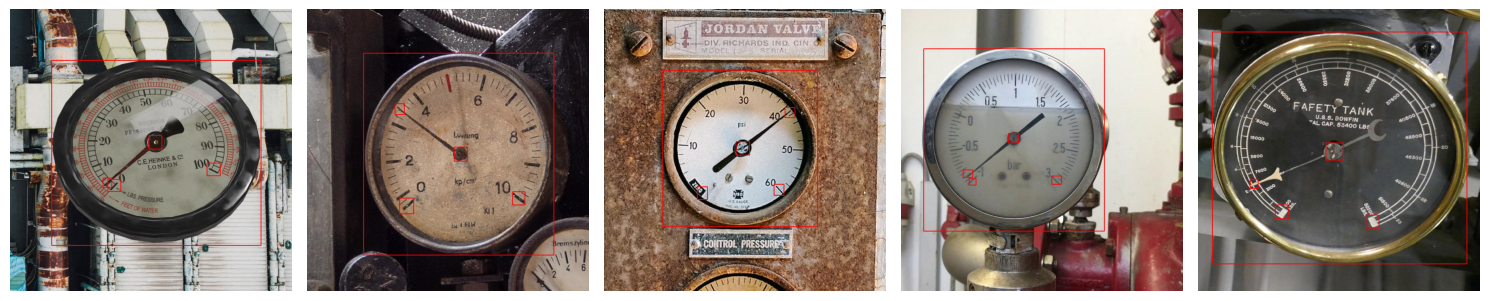

In [4]:
import random
from pathlib import Path
import sys

import matplotlib.pyplot as plt

# Get the parent directory
path_root = Path.cwd().parent
sys.path.append(str(path_root))

from src.visualization import plot_yolov8_bbox

image_files = [
    f for f in os.listdir(train_dir) if f.endswith((".jpg", ".jpeg", ".png"))
]
sample_imgs = random.sample(image_files, 5)

plt.figure(figsize=(15, 8))
for i, img_file in enumerate(sample_imgs):
    img_path = os.path.join(train_dir, img_file)
    label_file = os.path.splitext(img_file)[0] + ".txt"
    label_path = os.path.join(train_dir, "../labels", label_file)
    plt.subplot(1, 5, i + 1)
    plot_yolov8_bbox(img_path, label_path)
plt.tight_layout()
plt.show()